# Prediction of Outputs/ Sensitivity of GPEs to Inputs

First select the datatable to read in.

In [1]:
import pandas as pd

data = pd.read_table('LHC220_ExpDataTable.txt',delimiter=',')

In [2]:
data.head()

,Wind_Direction,Wind_Speed,Air_Density,BldPitch1,BldPitch2,BldPitch3,LSShftFxa,LSShftFya,LSShftFza,LSShftMxa,...,Blade2Region4,Blade2Region5,Blade2Region6,Blade3Region1,Blade3Region2,Blade3Region3,Blade3Region4,Blade3Region5,Blade3Region6,ErosionClass
0,11.897727,14.243182,1.187972,5.820897,5.820897,5.820897,603.372645,-1.480176,-3.451978,4180.139509,...,0.187500,0.111364,0.075000,0.107386,0.008523,0.412500,0.278409,0.470455,0.865909,light_moderate
1,9.238636,15.865909,1.192983,9.475813,9.475813,9.475813,525.595751,-10.190943,4.547302,4180.073270,...,0.055682,0.915909,0.625000,0.110795,0.065341,0.426136,0.394318,0.229545,0.547727,moderate
2,9.920455,5.743182,1.268710,0.000000,0.000000,0.000000,282.630901,-22.377370,-8.900686,689.634370,...,0.092045,0.697727,0.338636,0.158523,0.182386,0.382955,0.492045,0.956818,0.761364,light_moderate
3,5.965909,18.184091,1.244210,14.057100,14.057100,14.057100,454.267286,-1.667238,5.415940,4180.156382,...,0.492045,0.034091,0.193182,0.240341,0.101705,0.226136,0.023864,0.147727,0.465909,light
4,0.579545,18.415909,1.230290,0.000000,0.000000,0.000000,971.123981,13.969798,-22.057260,3683.609280,...,0.112500,0.220455,0.334091,0.055114,0.133523,0.487500,0.071591,0.506818,0.765909,moderate


In [3]:
column_names = data.columns

In [4]:
num = 135;
for i in range(3):
    print(i,column_names[i])
for i in range(18):
    print(i+615,column_names[i+615])
print('Output ',num,' is ',column_names[num])

0 Wind_Direction
1 Wind_Speed
2 Air_Density
615 Blade1Region1
616 Blade1Region2
617 Blade1Region3
618 Blade1Region4
619 Blade1Region5
620 Blade1Region6
621 Blade2Region1
622 Blade2Region2
623 Blade2Region3
624 Blade2Region4
625 Blade2Region5
626 Blade2Region6
627 Blade3Region1
628 Blade3Region2
629 Blade3Region3
630 Blade3Region4
631 Blade3Region5
632 Blade3Region6
Output  135  is  B3N6Cl


In [5]:
import numpy as np
from psimpy.emulator import ScalarGaSP
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
# Turn the datatable into and array
bigarray = data.to_numpy()

# Select the number of the output we want to predict
outputs = bigarray[:,num]
# manually set the ID
ID = 1;

# Select the inputs we want to use
#selected_ins = np.array([615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632])
#selected_ins = np.array([0,1,2,620,626,632])
#selected_ins = np.array([0,1,2])
#selected_ins = np.array([1,8,10])
selected_ins = np.array([0,1,2,620,626,632])
            
inputs = bigarray[:,selected_ins[:]]

num_in = len(inputs[0,:])

# We will scale the inputs before trying to predict the outputs for best results;
# But in order to avoid data leaks, first we will split the data, then scale the training data
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.15)
scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train) # Transform the training data
X_test_sc = scaler.transform(X_test) # Use the transformer fit on training data for testing

# Now that the data is scaled, we can proceed to try to fit a GPE
# We will evaluate it on a scatter diagram, a QuantileQuantile plot, 
# and calculate the RMSE and the correlation coefficient

# Select the model
emulator = ScalarGaSP(ndim=len(inputs[0,:]),num_initial_values=2)

# Fit the model
emulator.train(design=X_train_sc, response=y_train)

The upper bounds of the range parameters are 159.4033 160.9148 159.6816 160.9335 160.1764 165.3496 
The initial values of range parameters are 3.188065 3.218297 3.193633 3.218671 3.203529 3.306991 
Start of the optimization  1  : 
The number of iterations is  22 
 The value of the  marginal posterior  function is  -92.13428 
 Optimized range parameters are 159.4033 0.8076145 2.852747 2.143317 1.62853 1.493862 
 Optimized nugget parameter is 0 
 Convergence:  TRUE 
The initial values of range parameters are 7.14543 7.213188 7.157908 7.214026 7.180088 7.41198 
Start of the optimization  2  : 
The number of iterations is  25 
 The value of the  marginal posterior  function is  -92.13428 
 Optimized range parameters are 159.4033 0.8076144 2.852747 2.143317 1.62853 1.493862 
 Optimized nugget parameter is 0 
 Convergence:  TRUE 


RMSE training: 1.6093164219304605e-08
RMSE testing: 0.1581137681052109
Correlation Coefficient training: 0.9999999999999951
Correlation Coefficient testing: 0.3804942039460695


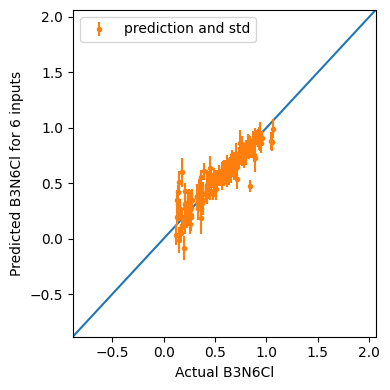

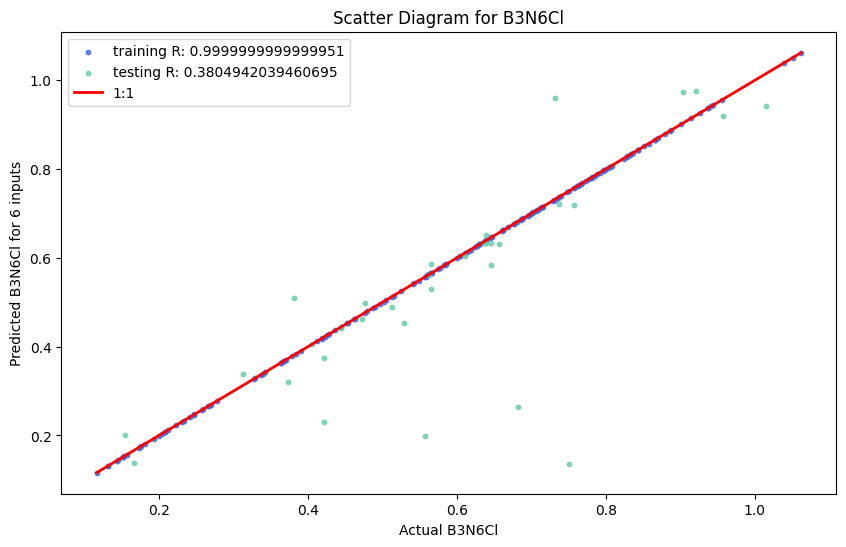

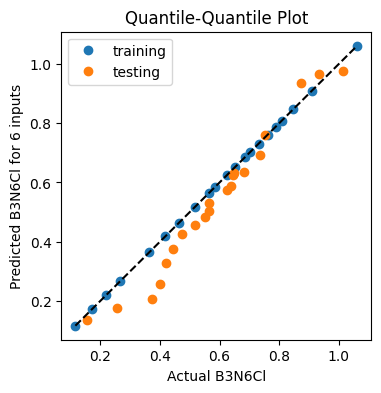

In [7]:
# Once the model is fit, run the various validation plot codes
name = column_names[num]
text1 = [
    'Included the following variables:',
    'ID = '
]
IDsav = 'GPEdescp'+str(num_in)+name+str(ID)+'.txt'
iter = 0
with open(IDsav,'w') as f:
                  for line in text1:
                      f.write(line)
                      if iter == 0:
                          f.write(str(selected_ins))
                      if iter == 1:
                          f.write(str(ID))
                      iter = iter + 1
                      f.write('\n')
f.close()    

# Validate the model
validation = emulator.loo_validate()

# Plot the validation
fig , ax = plt.subplots(figsize=(4,4))
y = y_train # for now y is made to be the training set
xaxtext = "Actual "+name
yaxtext = "Predicted "+name+" for " + str(num_in) + " inputs"
ax.set_xlabel(xaxtext)
ax.set_ylabel(yaxtext)
ax.set_xlim(np.min(y)-1,np.max(y)+1)
ax.set_ylim(np.min(y)-1,np.max(y)+1)

_ = ax.plot([np.min(y)-1,np.max(y)+1], [np.min(y)-1,np.max(y)+1])
_ = ax.errorbar(y, validation[:,0], validation[:,1], fmt='.', linestyle='', label='prediction and std')
_ = plt.legend()
plt.tight_layout()
sav1txt = "validation"+str(num_in)+name+str(ID)+".png"
plt.savefig(sav1txt)


predicted_train = emulator.predict(X_train_sc)
predicted_test = emulator.predict(X_test_sc)

predict_train = predicted_train[:,0]
predict_test = predicted_test[:,0]

# Calculate R factor and mean-square-error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

error_training = np.sqrt(mean_squared_error(predict_train,y_train))
error_test = np.sqrt(mean_squared_error(predict_test,y_test))

corr_coef_train = r2_score(predict_train,y_train)
corr_coef_test = r2_score(predict_test,y_test)

print('RMSE training:',error_training)
print('RMSE testing:', error_test)
print('Correlation Coefficient training:',corr_coef_train)
print('Correlation Coefficient testing:', corr_coef_test)

# Plot the Results
l1 = "training R: "+str(corr_coef_train)
l2 = "testing R: "+str(corr_coef_test)
fig2, ax = plt.subplots(figsize=(10,6))
ax.scatter(predict_train, y_train, color="royalblue", label=l1, s=10,alpha = 0.8)
ax.scatter(predict_test, y_test, color="mediumaquamarine", label=l2, s=10,alpha = 0.8)
ax.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()],color = "red", label = "1:1", linewidth=2)
ax.set_xlabel(xaxtext)
ax.set_ylabel(yaxtext)
ttl = "Scatter Diagram for "+name
ax.set_title(ttl)
ax.legend()
sav2txt = "scatterdiag"+str(num_in)+name+str(ID)+".png"
plt.savefig(sav2txt)
fig3, ax = plt.subplots(figsize=(4,4))
a = predict_train
b = y_train

c = predict_test
d = y_test

percs = np.linspace(0,100,21)
qn_a = np.percentile(a, percs)
qn_b = np.percentile(b, percs)
qn_c = np.percentile(c, percs)
qn_d = np.percentile(d, percs)

plt.plot(qn_a,qn_b, ls="", marker="o",label = "training")
plt.plot(qn_c,qn_d, ls="", marker="o",label = "testing")

x = np.linspace(np.min((qn_a.min(),qn_b.min())), np.max((qn_a.max(),qn_b.max())))
plt.plot(x,x, color="k", ls="--")
plt.title("Quantile-Quantile Plot")
plt.xlabel(xaxtext)
plt.ylabel(yaxtext)
plt.legend()
sav3txt = "QQ"+str(num_in)+name+str(ID)+".png"
plt.savefig(sav3txt)

In [127]:
sourceFile = open('python.txt', 'w')
print(emulator.emulator,file=sourceFile)
sourceFile.close()
file = open("python.txt", "r")
iter = 0;
while True:
    content=file.readline()
    if not content:
        break
    iter = iter+1;
file.close()
a = iter
file = open("python.txt", "r")
iter = 0;
while True:
    content=file.readline()
    if not content:
        break
    if iter == a-3:
        data = content
    iter = iter+1;
file.close()
import os
os.remove("python.txt")
data = data.split()
range_parms = np.zeros((1,6));
iter = 0;
for i in data[2:]:
    range_parms[0,iter] = np.double(i)
    iter = iter+1
print(range_parms)

[[159.4033      0.8076144   2.852747    2.143317    1.62853     1.493862 ]]
